## Kmeans

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Iris Dataset은 원래 label이 제공되지만, label이 없다고 가정하고 K-Mean 알고리즘으로 위 데이터를 그룹화 시켜봅시다.

### 모델링

클러스터링 하려는 그룹의 수 k 를 지정해줘야 합니다. sklearn에서는 n_clusters 옵션으로 지정할 수 있습니다

In [2]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans

X = iris.data

# 모델 객체 생성
kmeans = KMeans(n_clusters=3, random_state = 19)

In [4]:
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,19
,copy_x,True
,algorithm,'lloyd'


Kmeans를 수행한 다음 각 데이터를 그룹에 할당할 수 있습니다.

In [5]:
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

iris 데이터의 원래 그룹과 함께 비교해보면 아래처럼 클러스터가 배정되었습니다.

In [6]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [7]:
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: sepal_length, dtype: int64

### 결과 시각화

결과를 시각화해봅시다.

In [8]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


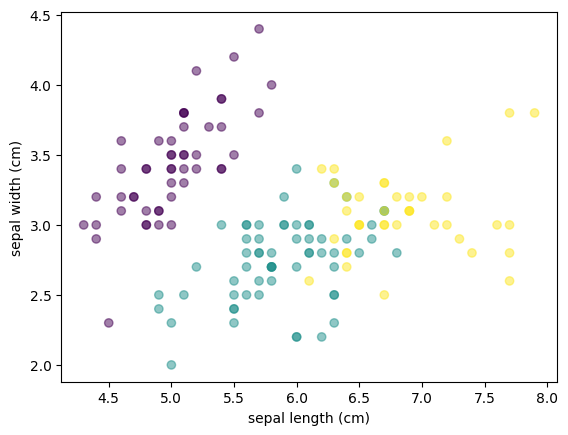

In [9]:
# 클러스터링 결과를 시각화합니다
x1 = X[:, 0]
x2 = X[:, 1]
plt.scatter(x1, x2, c=kmeans.labels_, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

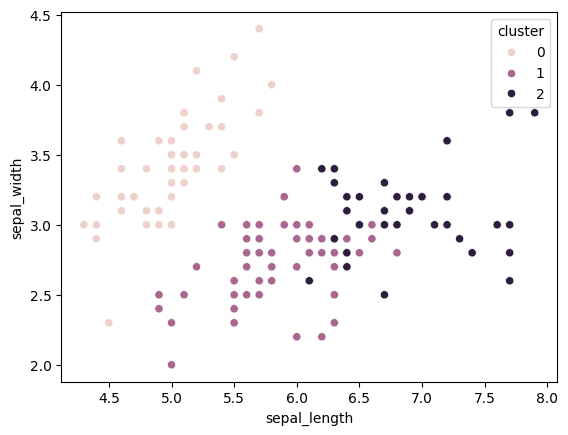

In [10]:
import seaborn as sns
sns.scatterplot(data=irisDF, x='sepal_length',
                y='sepal_width', hue='cluster')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

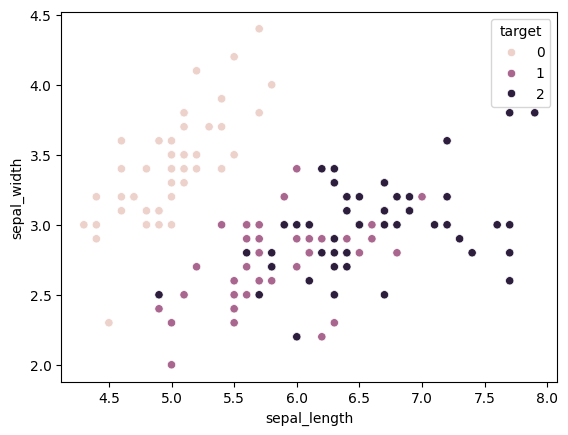

In [11]:
# target을  시각화합니다
sns.scatterplot(data=irisDF, x='sepal_length',
                y='sepal_width', hue='target')

In [12]:
iris_result

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: sepal_length, dtype: int64

In [13]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


### 클러스터 개수 정하기

KMeans 객체는 내부적으로 .inertia_ 속성을 가지고 있습니다.

 Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값입니다.   
 -> 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가합니다.

In [14]:
kmeans.inertia_

78.8556658259773

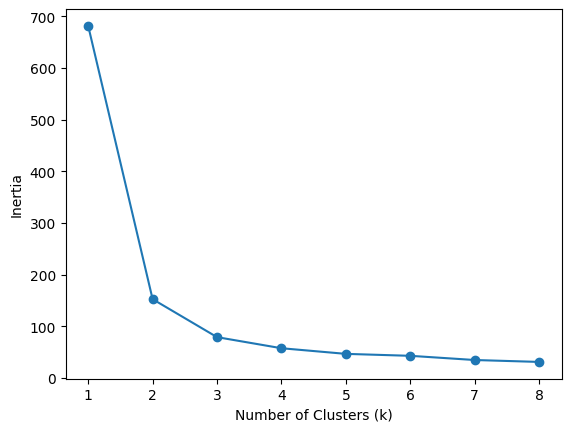

In [15]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

일반적으로 클러스터의 수가 증가할 수록 inertia는 감소하게 됩니다. 궁극적으로 클러스터의 수와 inertia간의 trade-off가 발생하게 됩니다. 우리의 목표는 inertia를 최소화 시키면서 동시에 클러스터의 수를 최소화 시키는 것입니다. 이 때 최적의 클러스터 수를 결정하는 한 가지 방법은 ‘elbow’ 메소드 입니다.

Elbow 메소드란 위 그래프를 사람의 팔로 간주하고, 팔꿈치 부분에 해당하는 클러스터 갯수를 선택하는 것을 말합니다. 즉 inertia가 감소하는 정도가 낮아지는 지점을 찾으면 됩니다. 위 그래프에서는 3 이 가장 최적의 클러스터의 수 라고 말할 수 있습니다.

In [ ]:
# !pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from kneed import KneeLocator
kl = KneeLocator(num_clusters, inertias, curve="convex", direction="decreasing")

print(f"자동으로 찾은 최적의 K값: {kl.elbow}")

자동으로 찾은 최적의 K값: 2


## 실습

In [18]:
# !gdown --id 18TLEN9Z17Fi2hdfuyfoR9fFEZ8nUuzLw

In [19]:
df = pd.read_csv("./content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


위 데이터 중 Annual Income과 Spending Score 두 가지 컬럼을 바탕으로 고객들을 클러스터링 하세요

### 데이터 전처리

In [20]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

### 모델링

In [21]:
from sklearn.cluster import KMeans

# 원하는 클러스러 개수 선정
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 3)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

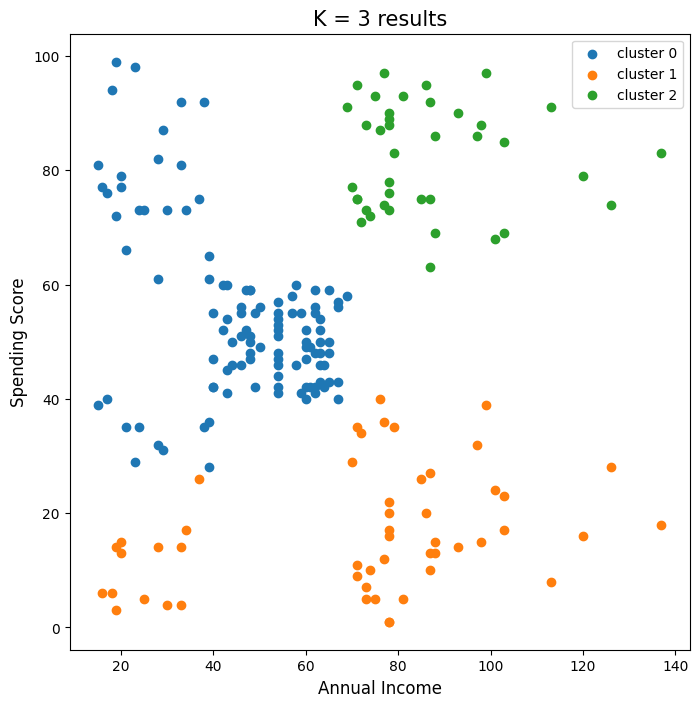

In [22]:
# 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

#### k 결정 - elbow method

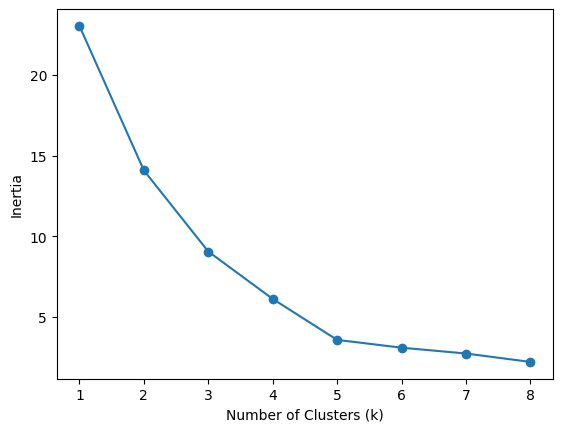

In [23]:
# elbow_method를 이용하여 클러스터의 개수를 정해보세요.

inertias = []

for i in range(1, 9):
    model = KMeans(n_clusters = i, random_state = 3)
    model.fit(data_scale)
    inertias.append(model.inertia_)


plt.plot(range(1, 9), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

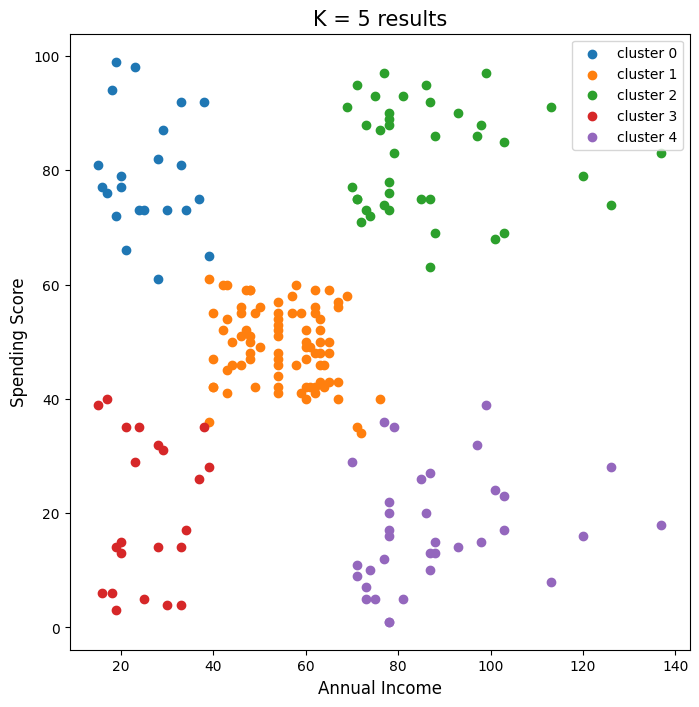

In [24]:
# 위의 elbow method 결과를 참고하여 다시한번 클러스터링하고, 시각화하세요

k=5
# 그룹 수, random_state 설정
model = KMeans(n_clusters=k)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster']=model.fit_predict(data_scale)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

## DBScan (Density-Based Spatial Clustering of Applications with Noise)

**1. 개요**
* **밀도(Density)** 기반의 군집화 알고리즘입니다.
* 데이터가 밀집되어 있는 공간을 하나의 군집(Cluster)으로 묶고, 밀도가 낮은 공간에 있는 데이터는 **노이즈(Noise, 이상치)** 로 분류합니다.
* 기하학적으로 복잡한 모양의 군집도 잘 찾아냅니다.

**2. 주요 파라미터 (Hyperparameters)**
* **$\epsilon$ (Epsilon, eps):** 개별 데이터를 중심으로 입력을 받아들이는 반경(거리)입니다.
* **$MinPts$ (Minimum Points):** $\epsilon$ 반경 내에 포함되어야 하는 최소 데이터 개수입니다.

**3. 데이터 포인트의 분류**
DBSCAN은 설정된 파라미터를 기준으로 데이터를 세 가지로 분류하며 군집을 형성합니다.

* **핵심 포인트 (Core Point):** 반경($\epsilon$) 내에 최소 데이터 개수($MinPts$) 이상의 이웃을 가진 점입니다. (군집의 중심)
* **경계 포인트 (Border Point):** 핵심 포인트의 반경 내에 포함되지만, 스스로는 핵심 포인트가 되지 못하는 점입니다. (군집의 외곽)
* **노이즈 포인트 (Noise Point):** 핵심 포인트도 아니고, 경계 포인트도 아닌 점입니다. (어떤 군집에도 속하지 않음)

**4. 장점과 단점**
* **장점:**
    * **군집의 개수(K)를 미리 지정할 필요가 없습니다.**
    * 원형이 아닌 불규칙한 형태의 군집도 잘 찾아냅니다.
    * 이상치(Outlier)를 효과적으로 감지하고 제외할 수 있습니다.
* **단점:**
    * 데이터의 밀도가 부위마다 다를 경우 군집화가 어렵습니다.
    * 파라미터($\epsilon$, $MinPts$) 설정에 민감하며 최적값을 찾기 까다로울 수 있습니다.

---

### **K-Means vs DBSCAN 비교**

| 비교 항목 | K-Means | DBSCAN |
| :--- | :--- | :--- |
| **군집 형성 원리** | 중심(Centroid)과의 거리 기반 | 데이터의 밀도(Density) 기반 |
| **군집 개수 설정** | **필요함 (K값 지정)** | **불필요 (자동 결정)** |
| **군집 형태** | 원형(Spherical) 또는 볼록한 형태 | 기하학적이고 임의적인 형태 |
| **이상치(Noise) 처리** | 민감함 (중심값에 영향을 줌) | **강건함 (별도의 노이즈로 분류)** |
| **파라미터 난이도** | 비교적 쉬움 (K값 탐색) | 어려움 ($\epsilon$, $MinPts$ 조절 필요) |
| **계산 복잡도** | 비교적 빠름 | 데이터 양이 많으면 느려질 수 있음 |:

In [25]:
# 라이브러리 불러오기
from sklearn.datasets import make_moons
import numpy as np

In [26]:
n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=0.05)  # noise (잡음) : noise가 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

In [27]:
df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


<Axes: xlabel='0', ylabel='1'>

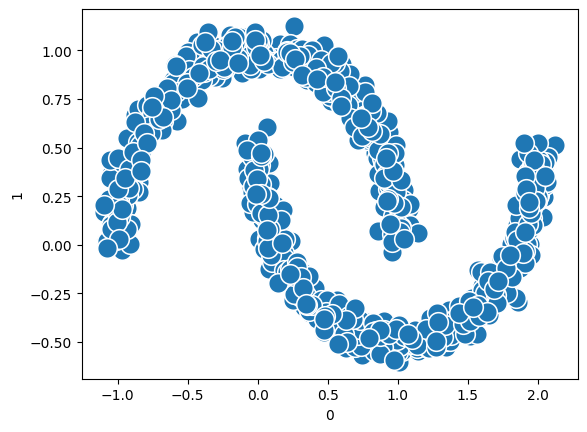

In [28]:
# 시각화
sns.scatterplot(x=df[0], y=df[1], s=200)

In [29]:
# k-means 클러스터링
model = KMeans(n_clusters=2, random_state=123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 클러스터의 중심점
centers = model.cluster_centers_

<Axes: xlabel='0', ylabel='1'>

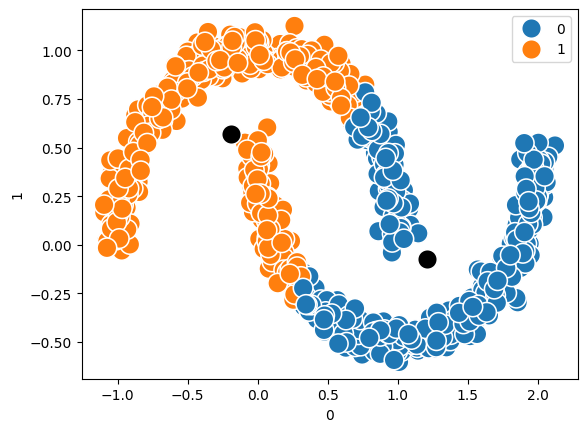

In [30]:
# k-means 클러스터링 결과 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

- 기하학적인 형태를 띄는 데이터에 k-means 클러스터링을 적용한 결과 centroid를 중심으로 가까운 거리의 데이터가 같은 클러스터로 묶였기 때문에 반달 모양으로 구분된 데이터의 특성이 잘 반영되지 못하는 것을 확인할 수 있음.

In [31]:
df.head()

,0,1,kmeans_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,1


In [32]:
df = df.drop(columns='kmeans_label', axis=1)
df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


In [33]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [34]:
n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=0.05)  # noise (잡음) : noise가 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

In [35]:
eps = 0.1  # 반경
min_samples = 5  # 최소 데이터 개수

In [36]:
# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

In [37]:
df.head()

,0,1,dbscan_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,0


<Axes: xlabel='0', ylabel='1'>

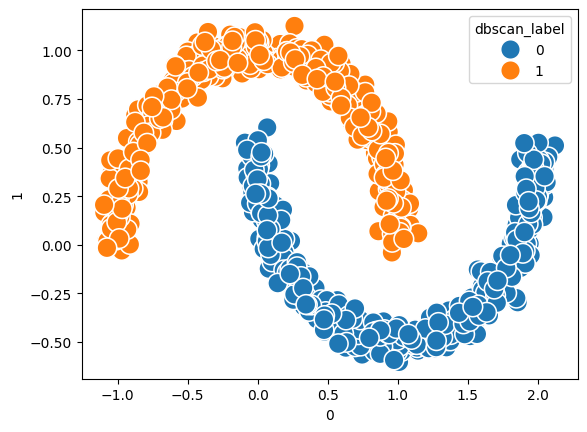

In [38]:
# DBSCAN 결과 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

## GMM (Gaussian Mixture Model)

- 가정) 데이터가 서로 다른 k개의 정규 분포에서 생성되었다고 가정
- 정규 분포란 평균을 중심으로 대칭이며 표준편차에 따라 흩어진 정도가 정해지는 분포
- GMM은 특정 데이터가 어떤 분포에 포함도리 확률이 더 큰지를 따져서 각 클러스터로 구분

In [39]:
# 데이터셋 생성
from sklearn.datasets import make_blobs

In [40]:
n_samples = 500  # 샘플 데이터 개수
centers = 4  # 클러스터 개수
cluster_std = 0.75  # 클러스터 내 표준편차
random_state = 13  # 샘플 데이터 고정

In [41]:
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

In [42]:
# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.2]]
data_tf = data @ tf  # @ : 행렬의 곱을 의미
df = pd.DataFrame(data_tf)

<Axes: xlabel='0', ylabel='1'>

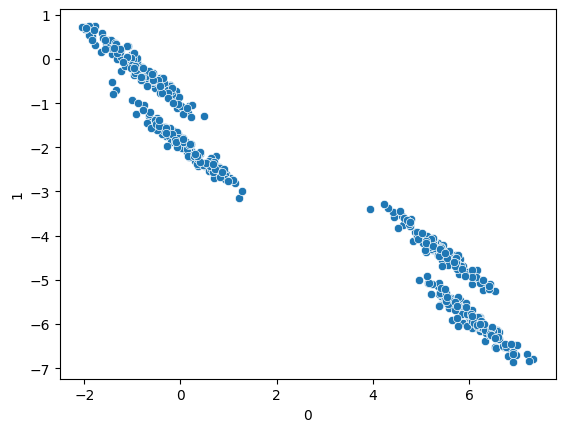

In [43]:
# 시각화
sns.scatterplot(x=df[0], y=df[1])

In [44]:
# k-means 클러스터링
from sklearn.cluster import KMeans

In [45]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_  # 각 클러스터의 centroid

<Axes: xlabel='0', ylabel='1'>

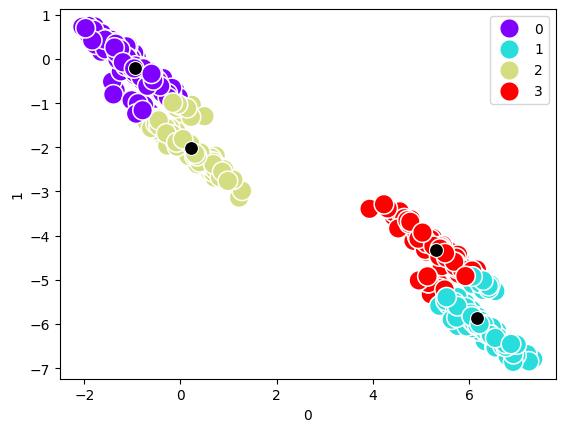

In [46]:
# k-means 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=100)

In [47]:
df.head()

,0,1,kmeans_label
0,-0.530621,-0.650974,0
1,5.071008,-4.103361,3
2,6.328584,-6.388701,1
3,-0.286233,-0.747913,0
4,6.175041,-6.088740,1


In [48]:
df = df.drop(columns=['kmeans_label'], axis=1)
df.head()

,0,1
0,-0.530621,-0.650974
1,5.071008,-4.103361
2,6.328584,-6.388701
3,-0.286233,-0.747913
4,6.175041,-6.088740


In [49]:
# GMM 클러스터링
from sklearn.mixture import GaussianMixture

In [50]:
n_components = 4  # 분포 개수
random_state = 10  # 모델 고정

In [51]:
# GMM 모델 학습
model = GaussianMixture(n_components=n_components, random_state=random_state)
model.fit(df)
df['gmm_label'] = model.predict(df)

<Axes: xlabel='0', ylabel='1'>

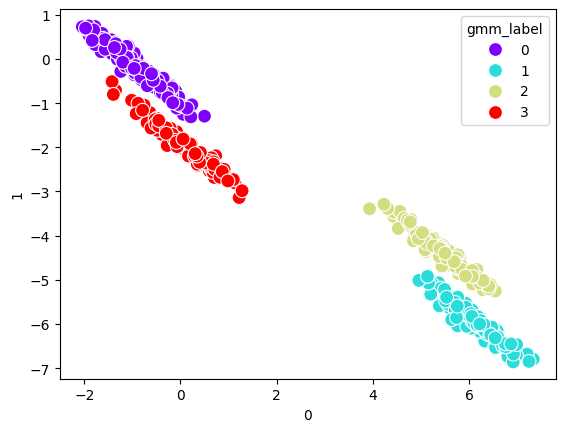

In [52]:
# GMM 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], palette='rainbow', s=100)

## 계층형 군집 모델

- 덴드로그램 (dendrogram) : 모든 클러스터의 계층이 구분되어 연결된 상태의 그래프

In [53]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("./content/Mall_Customers.csv")

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [54]:
# 라이브러리 불러오기
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [55]:
# 유사성 계산 : Ward Method
model = linkage(data_scale, 'ward')

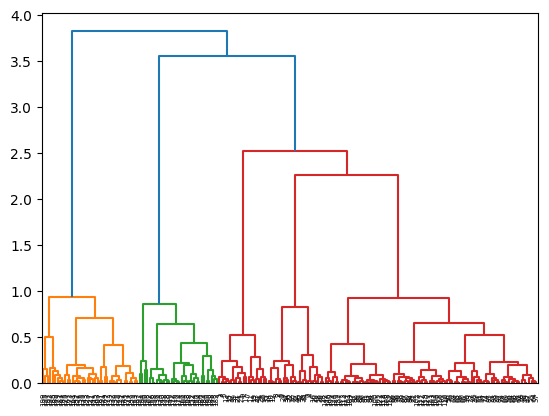

In [56]:
# 덴드로그램 시각화
dendrogram(model)
plt.show()

In [57]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
data['label'] = cut_tree(model, cluster_num)
data.head()

C:\Users\amy\AppData\Local\Temp\ipykernel_38072\4191253718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = cut_tree(model, cluster_num)


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0


In [58]:
data['label'].value_counts()

label
2    86
3    39
4    32
0    23
1    20
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

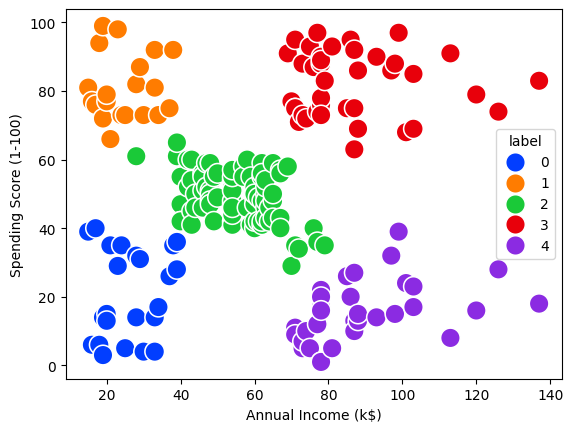

In [59]:
# 시각화
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['label'], s=200, palette='bright')